## FILTROS

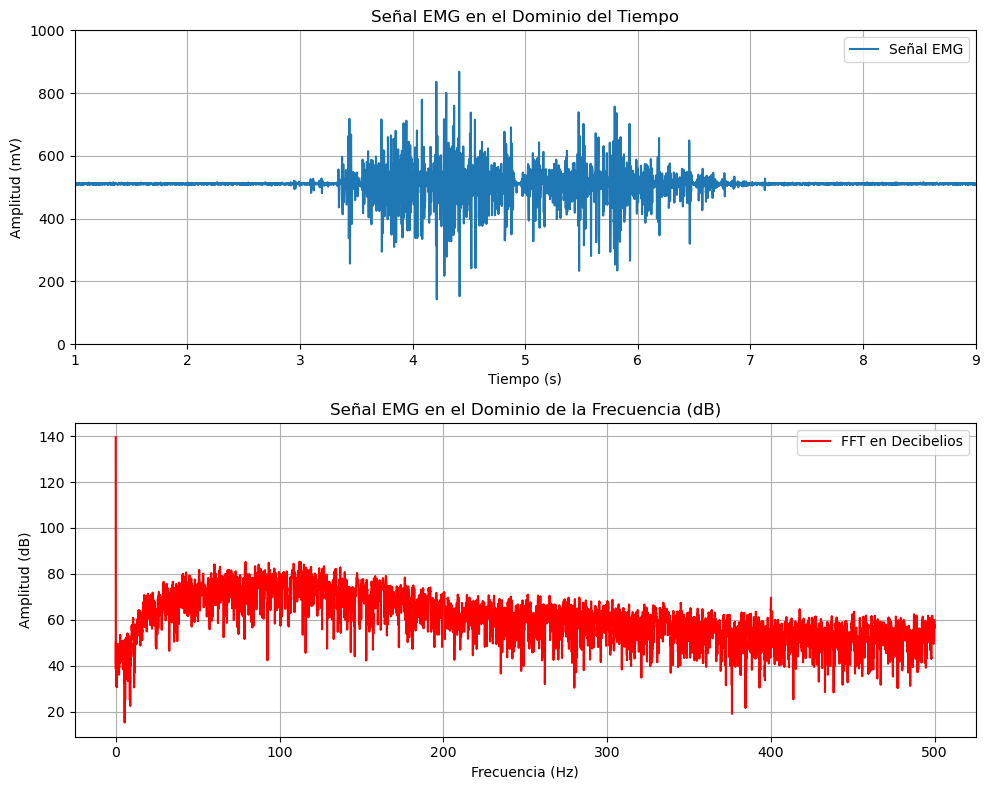

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Cargar el archivo de texto, asegurándonos de especificar la ruta correcta
data = np.loadtxt('C:/Users/Valeria Chavez/OneDrive/Escritorio/Signals/sEMG_signals/DedoPulgar/dedo_contrs.txt', comments='#')

# Extraer la columna correspondiente a la señal EMG (última columna: A1)
emg_signal = data[:, -1]

# Configurar la tasa de muestreo (1000 Hz, según la configuración del archivo)
sampling_rate = 1000  # Frecuencia de muestreo en Hz
n_samples = len(emg_signal)

# Crear el vector de tiempo
time = np.arange(n_samples) / sampling_rate

# Transformada de Fourier para obtener la señal en el dominio de la frecuencia
emg_fft = fft(emg_signal)
frequencies = fftfreq(n_samples, 1/sampling_rate)

# Calcular la magnitud de la FFT en decibelios
fft_magnitude = np.abs(emg_fft[:n_samples // 2])
fft_magnitude_db = 20 * np.log10(fft_magnitude)

# Frecuencias positivas para graficar
positive_freqs = frequencies[:n_samples // 2]

# Crear una figura con dos subplots (2 filas, 1 columna)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Graficar la señal EMG en el dominio del tiempo en el primer subplot
ax1.plot(time, emg_signal, label="Señal EMG")
ax1.set_title("Señal EMG en el Dominio del Tiempo")
ax1.set_xlabel("Tiempo (s)")
ax1.set_ylabel("Amplitud (mV)")  # Ajusta la unidad si es necesario
ax1.set_xlim([1, 9])
ax1.set_ylim([0, 1000])
ax1.grid(True)
ax1.legend()

# Graficar la FFT en decibelios en el segundo subplot
ax2.plot(positive_freqs, fft_magnitude_db, label="FFT en Decibelios", color='r')
ax2.set_title("Señal EMG en el Dominio de la Frecuencia (dB)")
ax2.set_xlabel("Frecuencia (Hz)")
ax2.set_ylabel("Amplitud (dB)")
ax2.grid(True)
ax2.legend()

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar la figura con ambas gráficas
plt.show()

Señal filtrada

In [ ]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Coeficientes b del filtro FIR que obtuviste de PyFDA
b = [-5.336E-05, 7.530E-06, 8.535E-05, -5.562E-05, -1.224E-04, 1.385E-04, 1.495E-04,
     -2.822E-04, -1.181E-04, 4.680E-04, 1.121E-06, -6.850E-04, 2.570E-04, 8.695E-04,
     -6.756E-04, -9.528E-04, 1.269E-03, 8.222E-04, -1.989E-03, -3.758E-04, 2.748E-03,
     -4.917E-04, -3.380E-03, 1.827E-03, 3.676E-03, -3.619E-03, -3.376E-03, 5.741E-03,
     2.227E-03, -7.958E-03, 2.535E-06, 9.900E-03, -3.453E-03, -1.109E-02, 8.155E-03,
     1.094E-02, -1.398E-02, -8.775E-03, 2.064E-02, 3.822E-03, -2.770E-02, 4.947E-03,
     3.463E-02, -1.929E-02, -4.083E-02, 4.349E-02, 4.575E-02, -9.337E-02, -4.891E-02,
     3.140E-01, 5.500E-01, 3.140E-01, -4.891E-02, -9.337E-02, 4.575E-02, 4.349E-02,
     -4.083E-02, -1.929E-02, 3.463E-02, 4.947E-03, -2.770E-02, 3.822E-03, 2.064E-02,
     -8.775E-03, -1.398E-02, 1.094E-02, 8.155E-03, -1.109E-02, -3.453E-03, 9.900E-03,
     2.535E-06, -7.958E-03, 2.227E-03, 5.741E-03, -3.376E-03, -3.619E-03, 3.676E-03,
     1.827E-03, -3.380E-03, -4.917E-04, 2.748E-03, -3.758E-04, -1.989E-03, 8.222E-04,
     1.269E-03, -9.528E-04, -6.756E-04, 8.695E-04, 2.570E-04, -6.850E-04, 1.121E-06,
     4.680E-04, -1.181E-04, -2.822E-04, 1.495E-04, 1.385E-04, -1.224E-04, -5.562E-05,
     8.535E-05, 7.530E-06, -5.336E-05]

# Para filtros FIR, el coeficiente 'a' es 1
a = [1]

# Filtrar la señal EMG (suponiendo que 'emg_signal' y 'time' ya están definidos)
filtered_signal = signal.lfilter(b, a, emg_signal)

# Graficar la señal EMG original y la señal filtrada
plt.figure(figsize=(10, 6))

# Señal original
plt.subplot(2, 1, 1)
plt.plot(time, emg_signal)
plt.title("Señal EMG Original")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (mV)")

# Señal filtrada
plt.subplot(2, 1, 2)
plt.plot(time, filtered_signal)
plt.title("Señal EMG Filtrada")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (mV)")

plt.tight_layout()
plt.show()